# Categorical variables vs Sales

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('tableau-colorblind10')
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

# Table of content
### 1. Load and merge
### 2. Competition Distance 
### 3. Categorical features vs target
________________

## 1. Load and merge

In [3]:
train = pd.read_csv("../../data/train.csv")
store = pd.read_csv("../../data/store.csv")

/Users/magdalenablum-oeste/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
merged_train_store = pd.merge(store, train, on='Store', how='left')

In [5]:
merged_train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-01,2.0,0.0,0.0,0.0,0.0,a,1.0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-02,3.0,5530.0,668.0,NaN,0.0,0,1.0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-03,4.0,4327.0,578.0,1.0,0.0,0,1.0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-04,5.0,4486.0,619.0,1.0,0.0,0,1.0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-05,6.0,4997.0,635.0,1.0,0.0,NaN,1.0


## 2. CompetitionDistance 

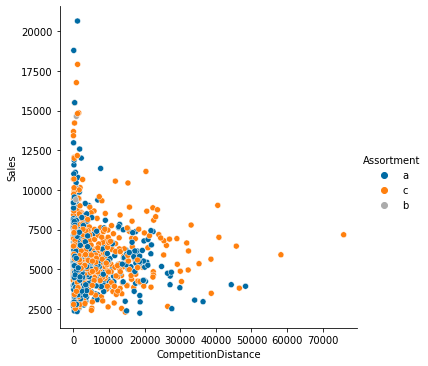

In [6]:
by_store_avg = merged_train_store.groupby(['Store', 'Assortment', 'StoreType'])
avg_sales_store = by_store_avg.agg(np.mean)
avg_sales_store = avg_sales_store.reset_index()

sns.relplot(x='CompetitionDistance', y='Sales',
            hue='Assortment',
            data=avg_sales_store);

<Figure size 1440x864 with 0 Axes>

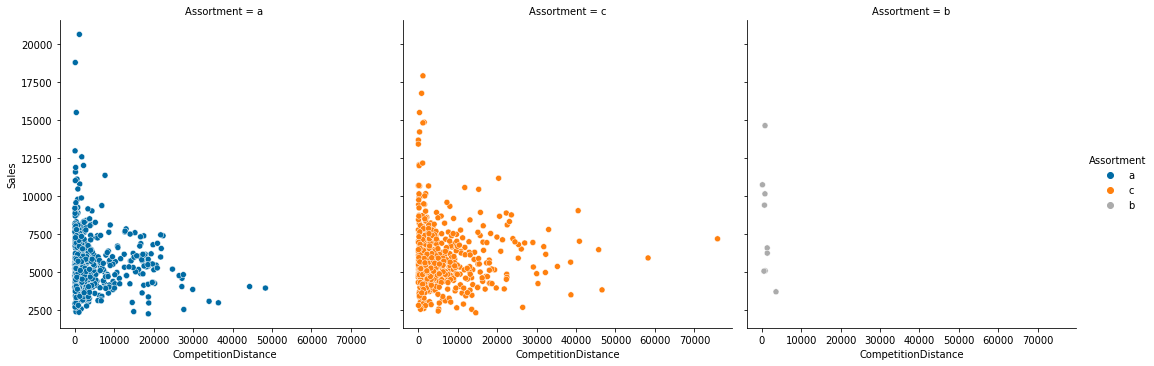

In [7]:
plt.figure(figsize=(20, 12))
sns.relplot(x='CompetitionDistance', y='Sales',
            col='Assortment',
            hue='Assortment',
            data=avg_sales_store);

<Figure size 1440x648 with 0 Axes>

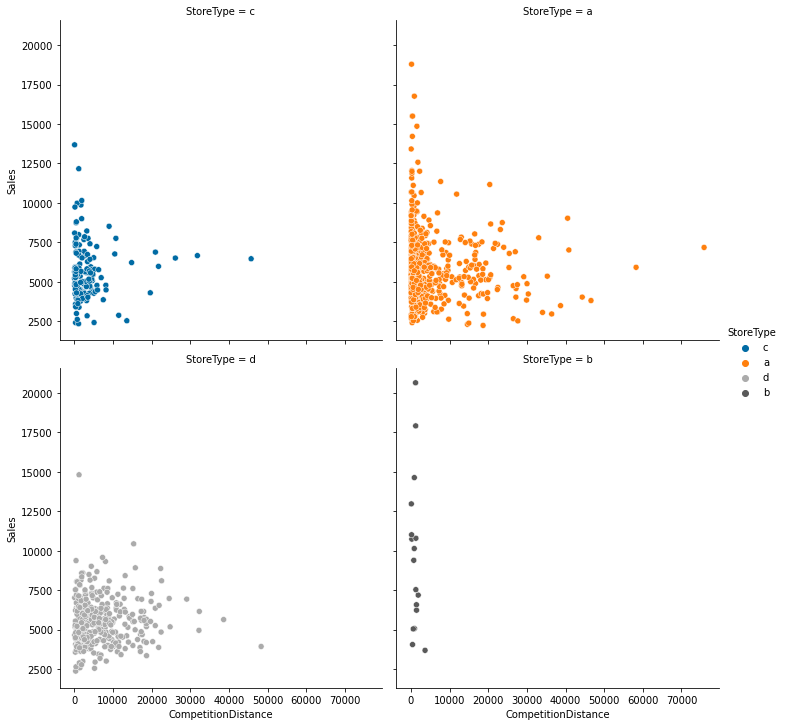

In [8]:
plt.figure(figsize=(20, 9))
sns.relplot(x='CompetitionDistance', y='Sales',
            col='StoreType',
            hue='StoreType',
            col_wrap=2,
            data=avg_sales_store);

## 3. Categorical features vs target

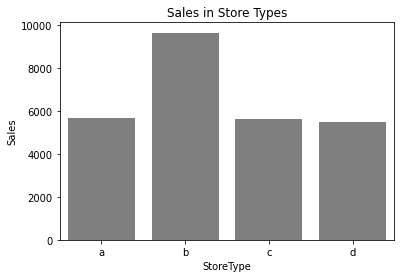

In [9]:
sns.barplot(x="StoreType", y="Sales", 
            ci=None,
            color = '#7f7f7f',
            data=merged_train_store.sort_values(by = ["StoreType"])).set_title("Sales in Store Types");

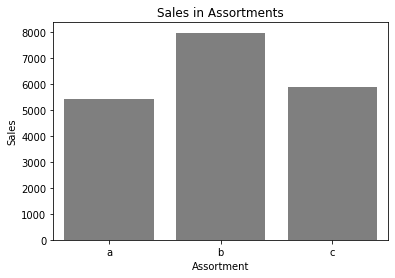

In [10]:
sns.barplot(x="Assortment", y="Sales", 
            ci=None,
            color = '#7f7f7f',
            data=merged_train_store.sort_values(by = ["Assortment"])).set_title("Sales in Assortments");

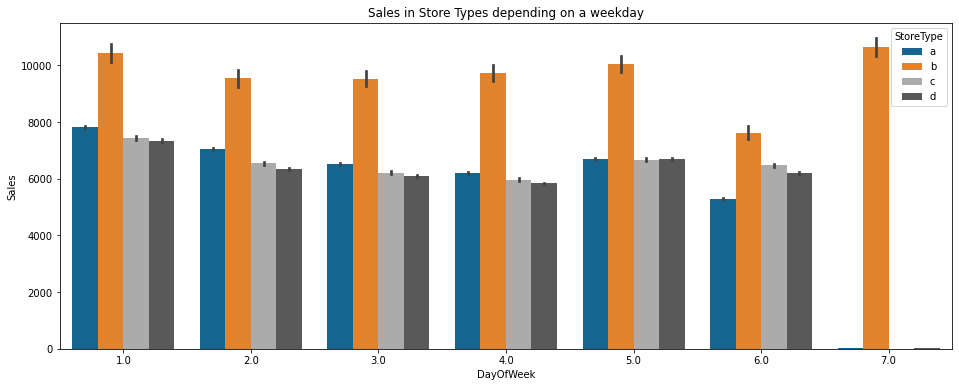

In [11]:

merged_train_store.sort_values(by = ['DayOfWeek', 'StoreType'])

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek', y='Sales', 
            #hue = 'Assortment', 
            hue = 'StoreType',
            data=merged_train_store.sort_values(by = ['DayOfWeek', 'StoreType']))
plt.title("Sales in Store Types depending on a weekday");

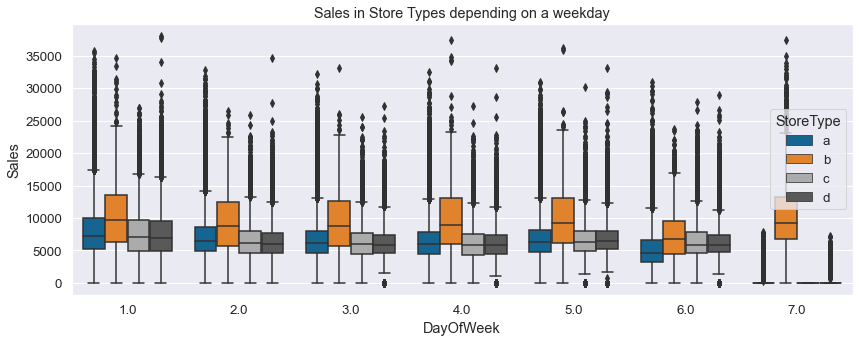

In [48]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='DayOfWeek', y='Sales', 
            #hue = 'Assortment', 
            hue = 'StoreType',
            data=merged_train_store.sort_values(by = ['DayOfWeek', 'StoreType']))
plt.title("Sales in Store Types depending on a weekday");